# Spam Filter

## 1. Import libraries 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## 2. Exploratory data analysis and data preprocessing

In [9]:
#Load data
data = pd.read_csv("spam.tsv", sep = "\t")

In [10]:
#Display first 5 rows
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [12]:
#Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


Observation: There are zero Nan values

In [6]:
data.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [14]:
#Find spam-ham ratio
data["label"].value_counts()*100/len(data)

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64

Observation: 87% is ham and 13% is spam

In [16]:
ham = data[data["label"] == 'ham']
spam = data[data["label"] == 'spam']

In [19]:
print(data["label"].value_counts())
ham.shape, spam.shape

label
ham     4825
spam     747
Name: count, dtype: int64


((4825, 4), (747, 4))

In [20]:
#Balancing spam-ham ratio
ham = ham.sample(spam.shape[0])

In [22]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [25]:
#Combine spam and ham datasets
df = pd.concat([ham,spam], ignore_index=True)

In [27]:
df.shape

(1494, 4)

In [50]:
df.head()

,label,message,length,punct
0,ham,K da:)how many page you want?,29,3
1,ham,"She said,'' do u mind if I go into the bedroom...",145,16
2,ham,"Aight, I'm chillin in a friend's room so text ...",71,4
3,ham,Ok...,5,3
4,ham,You know my old Dom I told you about yesterday...,141,2


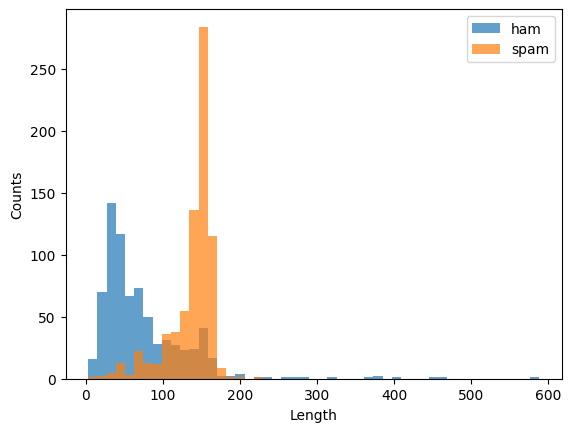

In [37]:
#Visualise message length
bins = np.linspace(min(ham["length"].min(), spam["length"].min()), max(ham["length"].max(), spam["length"].max()), 50)
counts1, _, _ = plt.hist(ham["length"], bins=bins, label="ham", alpha =0.7)
plt.hist(spam["length"], bins=bins, label="spam", alpha =0.7)
plt.legend()
plt.ylabel("Counts")
plt.xlabel("Length");

Observation: There is a higher chance that the spam messages have lengthy messages based on the dataset.

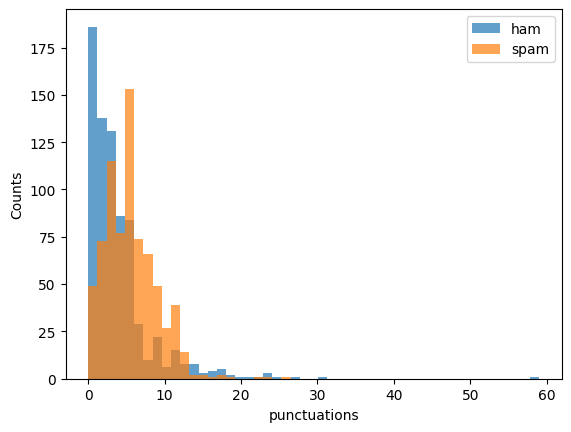

In [38]:
#Visualise punctuation
bins = np.linspace(min(ham["punct"].min(), spam["punct"].min()), max(ham["punct"].max(), spam["punct"].max()), 50)
counts1, _, _ = plt.hist(ham["punct"], bins=bins, label="ham", alpha =0.7)
plt.hist(spam["punct"], bins=bins, label="spam", alpha =0.7)
plt.legend()
plt.ylabel("Counts")
plt.xlabel("punctuations");

## 3. Building the model using Random Forest Classifier

In [53]:
#split data into and training and testing datasets
X_train, X_test, y_train, y_test =  train_test_split(df["message"], df["label"], test_size = 0.3, random_state =0, shuffle = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1045,), (449,), (1045,), (449,))

In [54]:
#convert textual data to numerical
classifier = Pipeline([("tfid", TfidfVectorizer()), ("rfc", RandomForestClassifier(n_estimators=100))])

In [55]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('rfc', RandomForestClassifier())])

## 4. Testing (RFC)

In [57]:
y_pred = classifier.predict(X_test)
y_test, y_pred
accuracy_score(y_test, y_pred)

0.9465478841870824

In [58]:
confusion_matrix(y_test, y_pred)

array([[227,   0],
       [ 24, 198]])

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       227
        spam       1.00      0.89      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



## 5. Building the model using Support Vector Classifier

In [63]:
classifier2 = Pipeline([("tfid", TfidfVectorizer()), ("svc", SVC(C = 100, gamma='auto'))])
classifier2.fit(X_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('svc', SVC(C=100, gamma='auto'))])

## 6. Testing (SVC)

In [65]:
y_pred = classifier2.predict(X_test)
y_test, y_pred
accuracy_score(y_test, y_pred)

0.9398663697104677

In [66]:
confusion_matrix(y_test, y_pred)

array([[223,   4],
       [ 23, 199]])

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.98      0.94       227
        spam       0.98      0.90      0.94       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



## 7. Prediction using RFC and SVC models

In [76]:
test_messages = [["Hey, just wanted to check in and see how you're doing."],
    ["You've won a free trip to the Bahamas! Claim your prize now."],
    ["Reminder: Our meeting is scheduled for tomorrow at 10 AM."],
    ["URGENT: Your account has been compromised. Click here to reset your password."],
    ["Don't forget to pick up groceries on your way home."],
    ["Congratulations on your recent achievement!"],
    ["Limited time offer: Get 50% off on all purchases today only!"],
    ["Congratulations! You've been selected for a special promotion. Click here for details."]]

labels = [["ham"], ["spam"], ["ham"], ["spam"], ["ham"], ["ham"], ["spam"], ["spam"]]

In [82]:
for index, message in enumerate(test_messages):
    prediction_label = classifier.predict(message)
    print(f"Message: {message}\nPredicted label: {prediction_label}")
    print(f"{'Correct Prediction!!!!' if labels[index]==prediction_label else 'Wrong Prediction!!!!'}\n")

Message: ["Hey, just wanted to check in and see how you're doing."]
Predicted label: ['ham']
Correct Prediction!!!!

Message: ["You've won a free trip to the Bahamas! Claim your prize now."]
Predicted label: ['spam']
Correct Prediction!!!!

Message: ['Reminder: Our meeting is scheduled for tomorrow at 10 AM.']
Predicted label: ['ham']
Correct Prediction!!!!

Message: ['URGENT: Your account has been compromised. Click here to reset your password.']
Predicted label: ['ham']
Wrong Prediction!!!!

Message: ["Don't forget to pick up groceries on your way home."]
Predicted label: ['ham']
Correct Prediction!!!!

Message: ['Congratulations on your recent achievement!']
Predicted label: ['ham']
Correct Prediction!!!!

Message: ['Limited time offer: Get 50% off on all purchases today only!']
Predicted label: ['ham']
Wrong Prediction!!!!

Message: ["Congratulations! You've been selected for a special promotion. Click here for details."]
Predicted label: ['ham']
Wrong Prediction!!!!



In [83]:
for index, message in enumerate(test_messages):
    prediction_label = classifier2.predict(message)
    print(f"Message: {message}\nPredicted label: {prediction_label}")
    print(f"{'Correct Prediction!!!!' if labels[index]==prediction_label else 'Wrong Prediction!!!!'}\n")

Message: ["Hey, just wanted to check in and see how you're doing."]
Predicted label: ['ham']
Correct Prediction!!!!

Message: ["You've won a free trip to the Bahamas! Claim your prize now."]
Predicted label: ['spam']
Correct Prediction!!!!

Message: ['Reminder: Our meeting is scheduled for tomorrow at 10 AM.']
Predicted label: ['ham']
Correct Prediction!!!!

Message: ['URGENT: Your account has been compromised. Click here to reset your password.']
Predicted label: ['spam']
Correct Prediction!!!!

Message: ["Don't forget to pick up groceries on your way home."]
Predicted label: ['ham']
Correct Prediction!!!!

Message: ['Congratulations on your recent achievement!']
Predicted label: ['spam']
Wrong Prediction!!!!

Message: ['Limited time offer: Get 50% off on all purchases today only!']
Predicted label: ['spam']
Correct Prediction!!!!

Message: ["Congratulations! You've been selected for a special promotion. Click here for details."]
Predicted label: ['ham']
Wrong Prediction!!!!

